# Prediction using Decision Tree Algorithm

### importing required packges

In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as mt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

### Reading the data

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv',index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### see the nature of data

In [3]:
data.shape

(150, 5)

In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualising the data

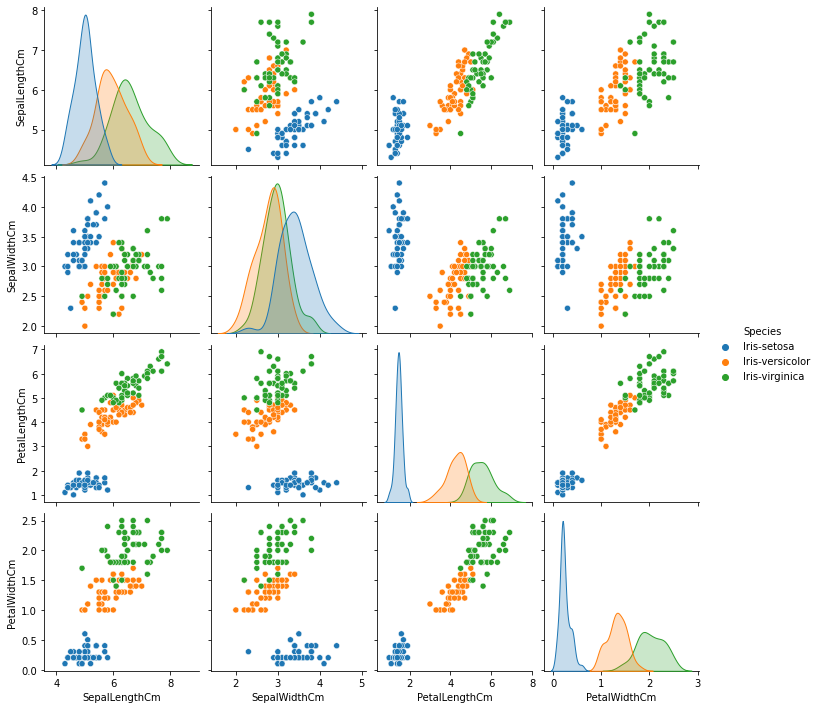

In [5]:

sns.pairplot(data, hue='Species')


### Correlation between each feature

In [6]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Visualising correlation

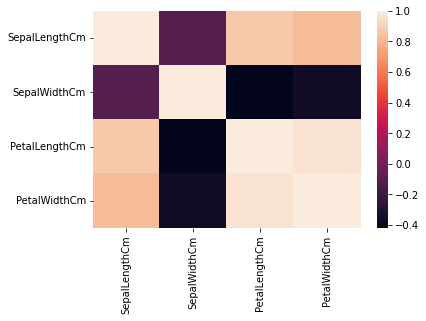

In [7]:
sns.heatmap(data.corr())

In [8]:
target=data['Species']
df=data.copy()
df=df.drop('Species', axis=1)

In [11]:
X=data.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
y=data['Species'].values

### Splitting data into train and test set

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)

Traingin split: (120, 4)
Testin spllit: (30, 4)


### Creating decision tree model

In [13]:
dtree=DecisionTreeClassifier()

### Fitting training dataset into the decision tree model

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### model preditction

In [15]:
y_pred=dtree.predict(X_test)

### Accuracy of the model

In [16]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Accuracy: 1.0


### Visualising the data through decision tree 

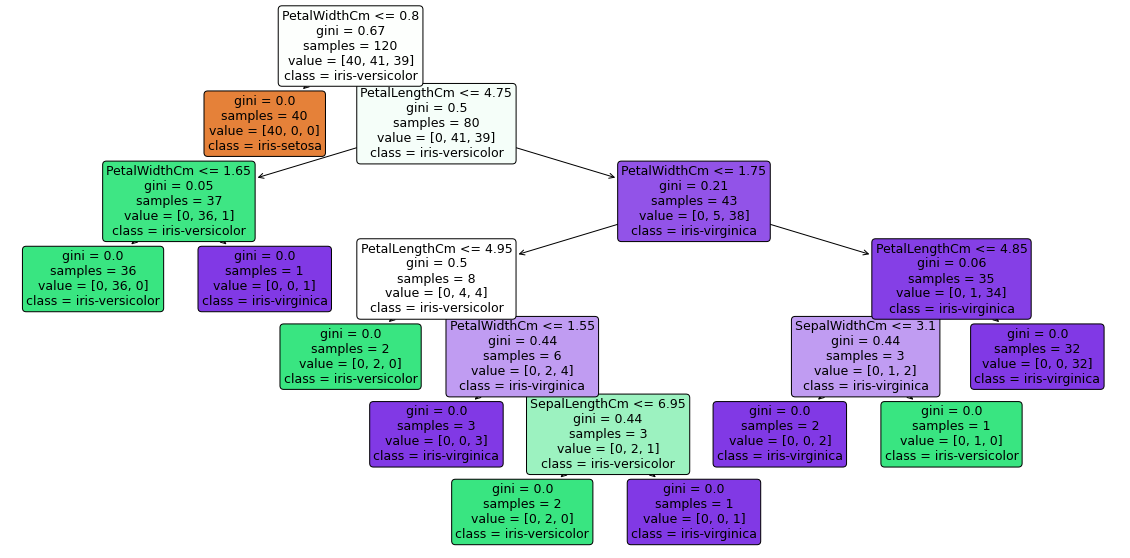

In [18]:
mt.figure(figsize=(20,10))
tree=plot_tree(dtree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=["iris-setosa","iris-versicolor","iris-virginica"])